In [2]:
import xarray
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
from scipy.signal import hilbert

## Reading the data

In [4]:
dset = xarray.load_dataset(filename_or_obj='/home/sangeetha/Work/Germany/bootcamp/data/steinmetz_neuromatch_dataset/steinmetz_2016-12-14_Cori.nc')


In [5]:
lfp_dset = dset.lfp
lfp = lfp_dset.to_dataframe()
lfp.head()

lfp
brain_area_lfp trial time          
ACA            1     0.01 -2.850794
                     0.02 -4.039683
                     0.03 -4.195238
                     0.04 -3.228571
                     0.05  0.460317

In [6]:
# finding brain areas
brain_areas = lfp.index.get_level_values(level='brain_area_lfp').unique()
brain_areas

Index(['ACA', 'LS', 'MOs', 'CA3', 'DG', 'SUB', 'VISp'], dtype='object', name='brain_area_lfp')

Phase-Locking Value (PLV) between SUB and VISp in trial 317: 0.4283


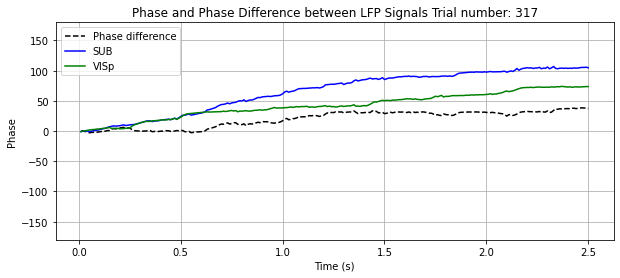

In [21]:
from scipy.signal import hilbert


brain_area1 = 'SUB'  
brain_area2 = 'VISp'

# Select trials for synchronization analysis
trial = np.random.randint(1,365)  

# Filter the DataFrame to select relevant data
lfp_area1 = lfp.loc[(lfp.index.get_level_values('brain_area_lfp') == brain_area1) & (lfp.index.get_level_values('trial') == trial)]
lfp_area2 = lfp.loc[(lfp.index.get_level_values('brain_area_lfp') == brain_area2) & (lfp.index.get_level_values('trial') == trial)]

# Compute the Hilbert transform to extract the analytic signal
analytic_signal1 = hilbert(lfp_area1['lfp'])
analytic_signal2 = hilbert(lfp_area2['lfp'])

# Calculate the phase of the analytic signal
phase1 = np.angle(analytic_signal1)
phase2 = np.angle(analytic_signal2)

# Compute the Phase-Locking Value (PLV) for the selected frequency band
plv = np.abs(np.mean(np.exp(1j * (phase1 - phase2))))

# Print the PLV
print(f"Phase-Locking Value (PLV) between {brain_area1} and {brain_area2} in trial {trial}: {plv:.4f}")

# Plot the phase difference between the two signals
plt.figure(figsize=(10, 4))
plt.plot(lfp_area1.index.get_level_values('time'), np.unwrap(phase1 - phase2), color='k', linestyle='--', label='Phase difference')
plt.plot(lfp_area1.index.get_level_values('time'), np.unwrap(phase1), color='b', label=brain_area1)
plt.plot(lfp_area2.index.get_level_values('time'), np.unwrap(phase2), color='g', label=brain_area2)
plt.xlabel('Time (s)')
plt.ylabel('Phase')
plt.title(f'Phase and Phase Difference between LFP Signals Trial number: {trial}')
plt.ylim(-180.,180.)
plt.legend()
plt.grid(True)

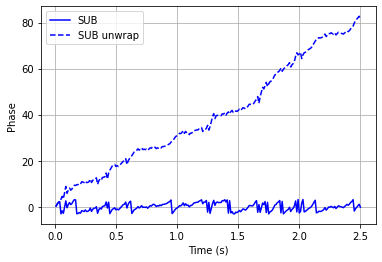

In [25]:
# without unwrapping

plt.plot(lfp_area1.index.get_level_values('time'), phase1, color='b', label=brain_area1)
plt.plot(lfp_area1.index.get_level_values('time'), np.unwrap(phase1), "b--", label=brain_area1+" unwrap")
plt.xlabel('Time (s)')
plt.ylabel('Phase')
# plt.ylim(-180.,180.)
plt.legend()
plt.grid(True)